# 과제 1: 초승달 데이터셋 클러스터링

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 초승달 데이터셋 생성
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

In [3]:
# DBSCAN 군집화
eps = 0.2
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

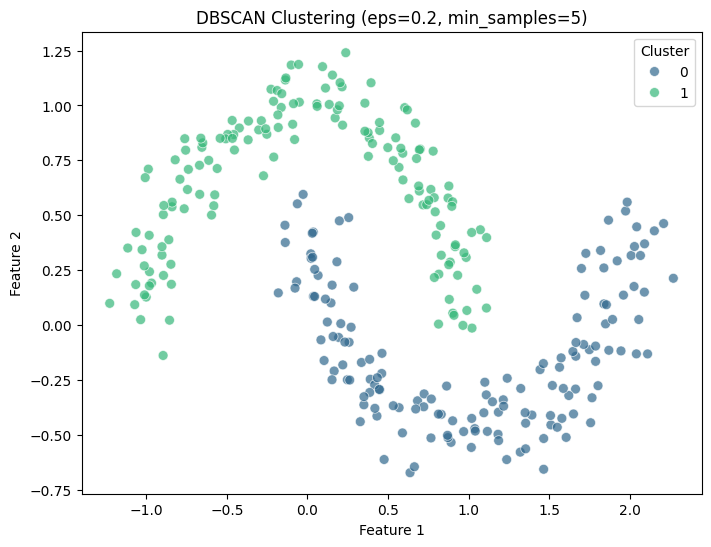

In [4]:
# 군집 및 이상치 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='viridis', legend='full', s=50, alpha=0.7)
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster", loc="upper right")
plt.show()

In [5]:
# 이상치 확인
n_outliers = sum(clusters == -1)
print(f"Number of outliers detected: {n_outliers}")

Number of outliers detected: 0


# 과제2: 실제 데이터셋에서 이상치 탐지

In [20]:
from sklearn.datasets import load_wine

In [21]:
wine = load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)

In [22]:
# 데이터 스케일링
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_data)

In [83]:
# DBSCAN 적용
eps_wine = 1.8
min_samples_wine = 7
wine_dbscan = DBSCAN(eps=eps_wine, min_samples=min_samples_wine)
wine_clusters = wine_dbscan.fit_predict(wine_scaled)

In [84]:
# 클러스터 및 이상치 분석
n_outliers_wine = sum(wine_clusters == -1)
n_clusters_wine = len(set(wine_clusters)) - (1 if -1 in wine_clusters else 0)
outlier_ratio = n_outliers_wine / len(wine_clusters)

In [85]:
cluster_counts = pd.Series(wine_clusters).value_counts()
print(f"클러스터 개수: {n_clusters_wine}")
print(f"이상치 개수: {n_outliers_wine}")
print(f"클러스터별 샘플 수:\n{cluster_counts}")

클러스터 개수: 3
이상치 개수: 156
클러스터별 샘플 수:
-1    156
 2      8
 1      7
 0      7
Name: count, dtype: int64


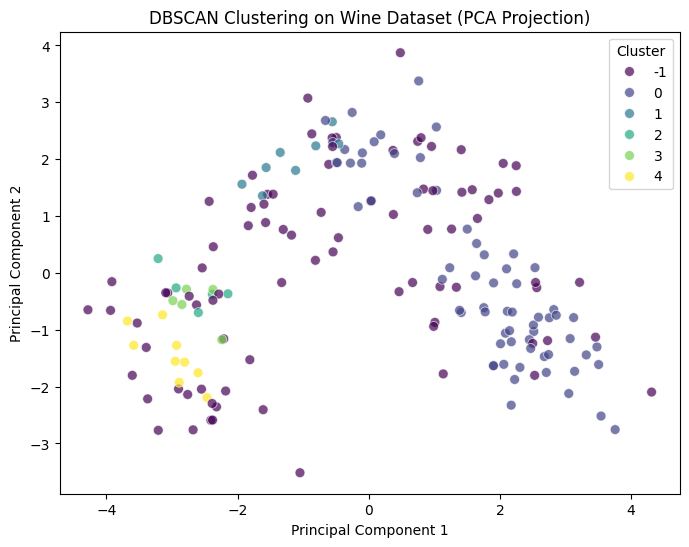

In [26]:
# 클러스터 시각화 (2D Projection using PCA)
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=wine_clusters, palette='viridis', legend='full', s=50, alpha=0.7)
plt.title("DBSCAN Clustering on Wine Dataset (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="upper right")
plt.show()